In [2]:
# !pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations


^C


In [2]:
import os
import time
import uuid#this hwlps us to create a unique identifer for the images 
import cv2

In [3]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [10]:
cap=cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret,frame=cap.read()
    imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)

    if cv2.waitKey(0) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
!labelme

2024-04-04 14:41:43,772 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Raghav Aggarwal\.labelmerc


In [13]:
import tensorflow as tf
import cv2
import json 
import numpy as np 
from matplotlib import pyplot as plt

In [14]:
images=tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [ ]:
images.as_numpy_iterator().next()

b'data\\images\\01e088ea-f020-11ee-a60f-e454e8285120.jpg'

In [15]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [16]:
images=images.map(load_image)

In [17]:
images.as_numpy_iterator().next()

array([[[117, 140, 146],
        [115, 138, 144],
        [114, 139, 144],
        ...,
        [129, 140, 146],
        [128, 139, 145],
        [127, 138, 144]],

       [[117, 140, 146],
        [115, 140, 145],
        [116, 141, 146],
        ...,
        [128, 139, 143],
        [128, 139, 143],
        [127, 138, 142]],

       [[116, 141, 146],
        [116, 141, 146],
        [116, 141, 146],
        ...,
        [129, 139, 141],
        [128, 138, 140],
        [127, 137, 139]],

       ...,

       [[ 66, 133, 162],
        [ 63, 129, 161],
        [ 59, 125, 159],
        ...,
        [ 78,  65,  59],
        [ 80,  67,  61],
        [ 80,  67,  61]],

       [[ 59, 128, 159],
        [ 56, 125, 156],
        [ 55, 124, 157],
        ...,
        [ 78,  63,  56],
        [ 78,  63,  56],
        [ 78,  63,  56]],

       [[ 57, 126, 157],
        [ 55, 124, 155],
        [ 55, 123, 158],
        ...,
        [ 78,  63,  56],
        [ 77,  62,  55],
        [ 77,  62,  55]]

In [18]:
images_generator=images.batch(4).as_numpy_iterator()

In [19]:
plot_images=images_generator.next()

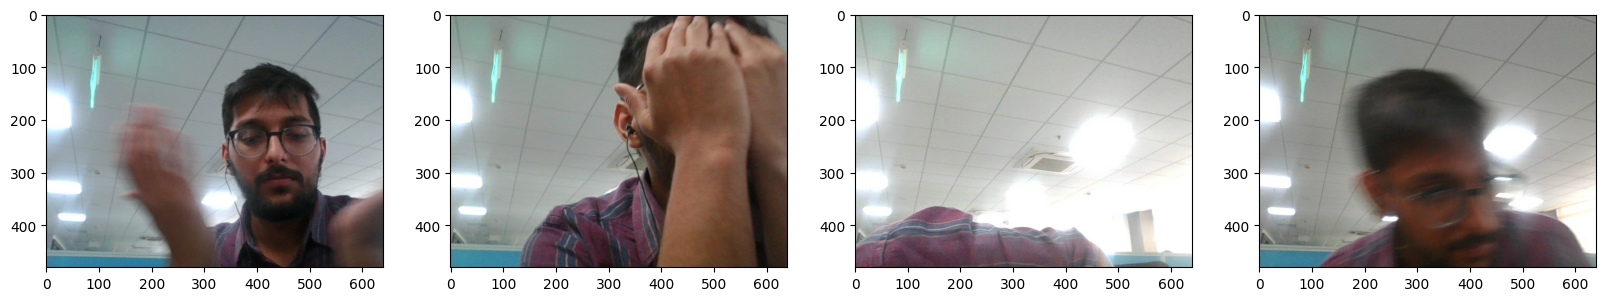

In [20]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [21]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)


In [23]:
import albumentations as alb

ModuleNotFoundError: No module named 'albumentations'

In [ ]:
# augmentor=alb.Compose([alb.RandomCrop(width=450,height=450),
#                        alb.HorizontalFlip(p=0.45),
#                        alb.RandomBrightnessContrast(p=0.2),
#                        alb.RandomGamma(p=0.2),
#                        alb.RGBShift(p=0.2),
#                     #    alb.VerticalFlip(p=0.5)],
#                        bbox_params=alb.BboxParams(format='albumentations',
#                                                   label_fields=['class_labels']))

In [24]:
img = cv2.imread(os.path.join('data','train', 'images','1e44c06b-f000-11ee-8186-e454e8285120.jpg'))

In [25]:
img

array([[[157, 162, 147],
        [154, 159, 144],
        [151, 158, 145],
        ...,
        [ 22,  31,  40],
        [ 25,  33,  33],
        [ 25,  35,  29]],

       [[158, 162, 150],
        [155, 159, 147],
        [152, 159, 146],
        ...,
        [ 21,  32,  40],
        [ 23,  33,  33],
        [ 23,  34,  31]],

       [[157, 161, 150],
        [155, 159, 148],
        [154, 158, 147],
        ...,
        [ 18,  34,  41],
        [ 21,  34,  36],
        [ 20,  34,  32]],

       ...,

       [[210, 214, 202],
        [210, 214, 202],
        [211, 215, 203],
        ...,
        [144, 138, 119],
        [150, 142, 125],
        [154, 146, 129]],

       [[211, 216, 201],
        [211, 216, 201],
        [211, 216, 201],
        ...,
        [157, 157, 143],
        [154, 152, 141],
        [145, 143, 133]],

       [[211, 216, 201],
        [211, 216, 201],
        [212, 217, 202],
        ...,
        [185, 189, 178],
        [194, 195, 186],
        [182, 182, 176]]

In [26]:
with open(os.path.join('data', 'train', 'labels', '1e44c06b-f000-11ee-8186-e454e8285120.json'), 'r') as f:
    label = json.load(f)


In [27]:
label['shapes'][0]['points']

[[238.9655172413793, 1.2068965517241508],
 [387.2413793103448, 107.52873563218392]]

In [28]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [29]:
coords

[238.9655172413793, 1.2068965517241508, 387.2413793103448, 107.52873563218392]

In [30]:
coords = list(np.divide(coords, [640,480,640,480]))


In [31]:
coords

[0.37338362068965514,
 0.002514367816091981,
 0.6050646551724138,
 0.22401819923371652]

In [32]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


NameError: name 'augmentor' is not defined

In [61]:
augmented['bboxes'][0][2:]

(0.6738697318007663, 1.0)

In [62]:
augmented['bboxes']

[(0.344367816091954, 0.7810472541507024, 0.6738697318007663, 1.0)]

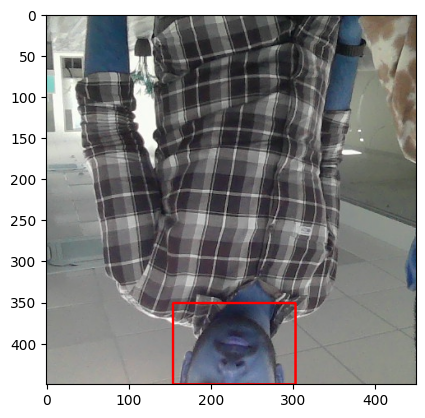

In [63]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [67]:
# for partition in ['train','test','val']: 
#     for image in os.listdir(os.path.join('data', partition, 'images')):
#         img = cv2.imread(os.path.join('data', partition, 'images', image))

#         coords = [0,0,0.00001,0.00001]
#         label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as f:
#                 label = json.load(f)

#             coords[0] = label['shapes'][0]['points'][0][0]
#             coords[1] = label['shapes'][0]['points'][0][1]
#             coords[2] = label['shapes'][0]['points'][1][0]
#             coords[3] = label['shapes'][0]['points'][1][1]
#             coords = list(np.divide(coords, [640,480,640,480]))

#         try: 
#             for x in range(50):
#                 augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
#                 cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

#                 annotation = {}
#                 annotation['image'] = image

#                 if os.path.exists(label_path):
#                     if len(augmented['bboxes']) == 0: 
#                         annotation['bbox'] = [0,0,0,0]
#                         annotation['class'] = 0 
#                     else: 
#                         annotation['bbox'] = augmented['bboxes'][0]
#                         annotation['class'] = 1
#                 else: 
#                     annotation['bbox'] = [0,0,0,0]
#                     annotation['class'] = 0 


#                 with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
#                     json.dump(annotation, f)

#         except Exception as e:
#             print(e)

In [68]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [69]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [70]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()[0].shape()


array([[[0.4351103 , 0.48069853, 0.46501225],
        [0.42126226, 0.4800858 , 0.46047795],
        [0.41188726, 0.48284313, 0.45931372],
        ...,
        [0.52677697, 0.5620711 , 0.54246324],
        [0.5328431 , 0.5681372 , 0.5485294 ],
        [0.5303309 , 0.5716299 , 0.5539216 ]],

       [[0.4278799 , 0.4492647 , 0.43357843],
        [0.42346814, 0.45974264, 0.4396446 ],
        [0.41813725, 0.475     , 0.4476103 ],
        ...,
        [0.5278799 , 0.56170344, 0.5504289 ],
        [0.5337623 , 0.5690564 , 0.5572917 ],
        [0.5351103 , 0.5704044 , 0.5586397 ]],

       [[0.27322304, 0.31617647, 0.28480393],
        [0.27267158, 0.31188726, 0.28051472],
        [0.27083334, 0.31004903, 0.27867648],
        ...,
        [0.55245095, 0.57598037, 0.5681372 ],
        [0.5411765 , 0.575     , 0.57058823],
        [0.54675245, 0.5746936 , 0.56832105]],

       ...,

       [[0.3759804 , 0.43039215, 0.42303923],
        [0.37297794, 0.42003676, 0.42003676],
        [0.36954656, 0

In [72]:
def load_labels(label_path):
    with open(label_path.numpy(),'r',encoding="utf-8") as f:
        label=json.load(f)
    return [label['class']],label['bbox']

In [73]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [74]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [75]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [76]:
train_labels.as_numpy_iterator().next()


(array([1], dtype=uint8),
 array([0.      , 0.      , 0.002989, 0.282   ], dtype=float16))

In [1]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

NameError: name 'train_images' is not defined

In [147]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(7000)
train = train.batch(8)
train = train.prefetch(4)

In [148]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(2500)
test = test.batch(8)
test = test.prefetch(4)

In [149]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(2000)
val = val.batch(8)
val = val.prefetch(4)

In [150]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.      , 0.012314, 0.2188  , 0.514   ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.9766  , 0.2693  , 1.      , 0.786   ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.8247  , 0.49    , 1.      , 0.7656  ],
        [0.      , 0.0388  , 0.1593  , 0.298   ],
        [0.      , 0.386   , 0.0581  , 0.9736  ]], dtype=float16))

In [151]:
data_samples = train.as_numpy_iterator()

In [152]:
res = data_samples.next()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


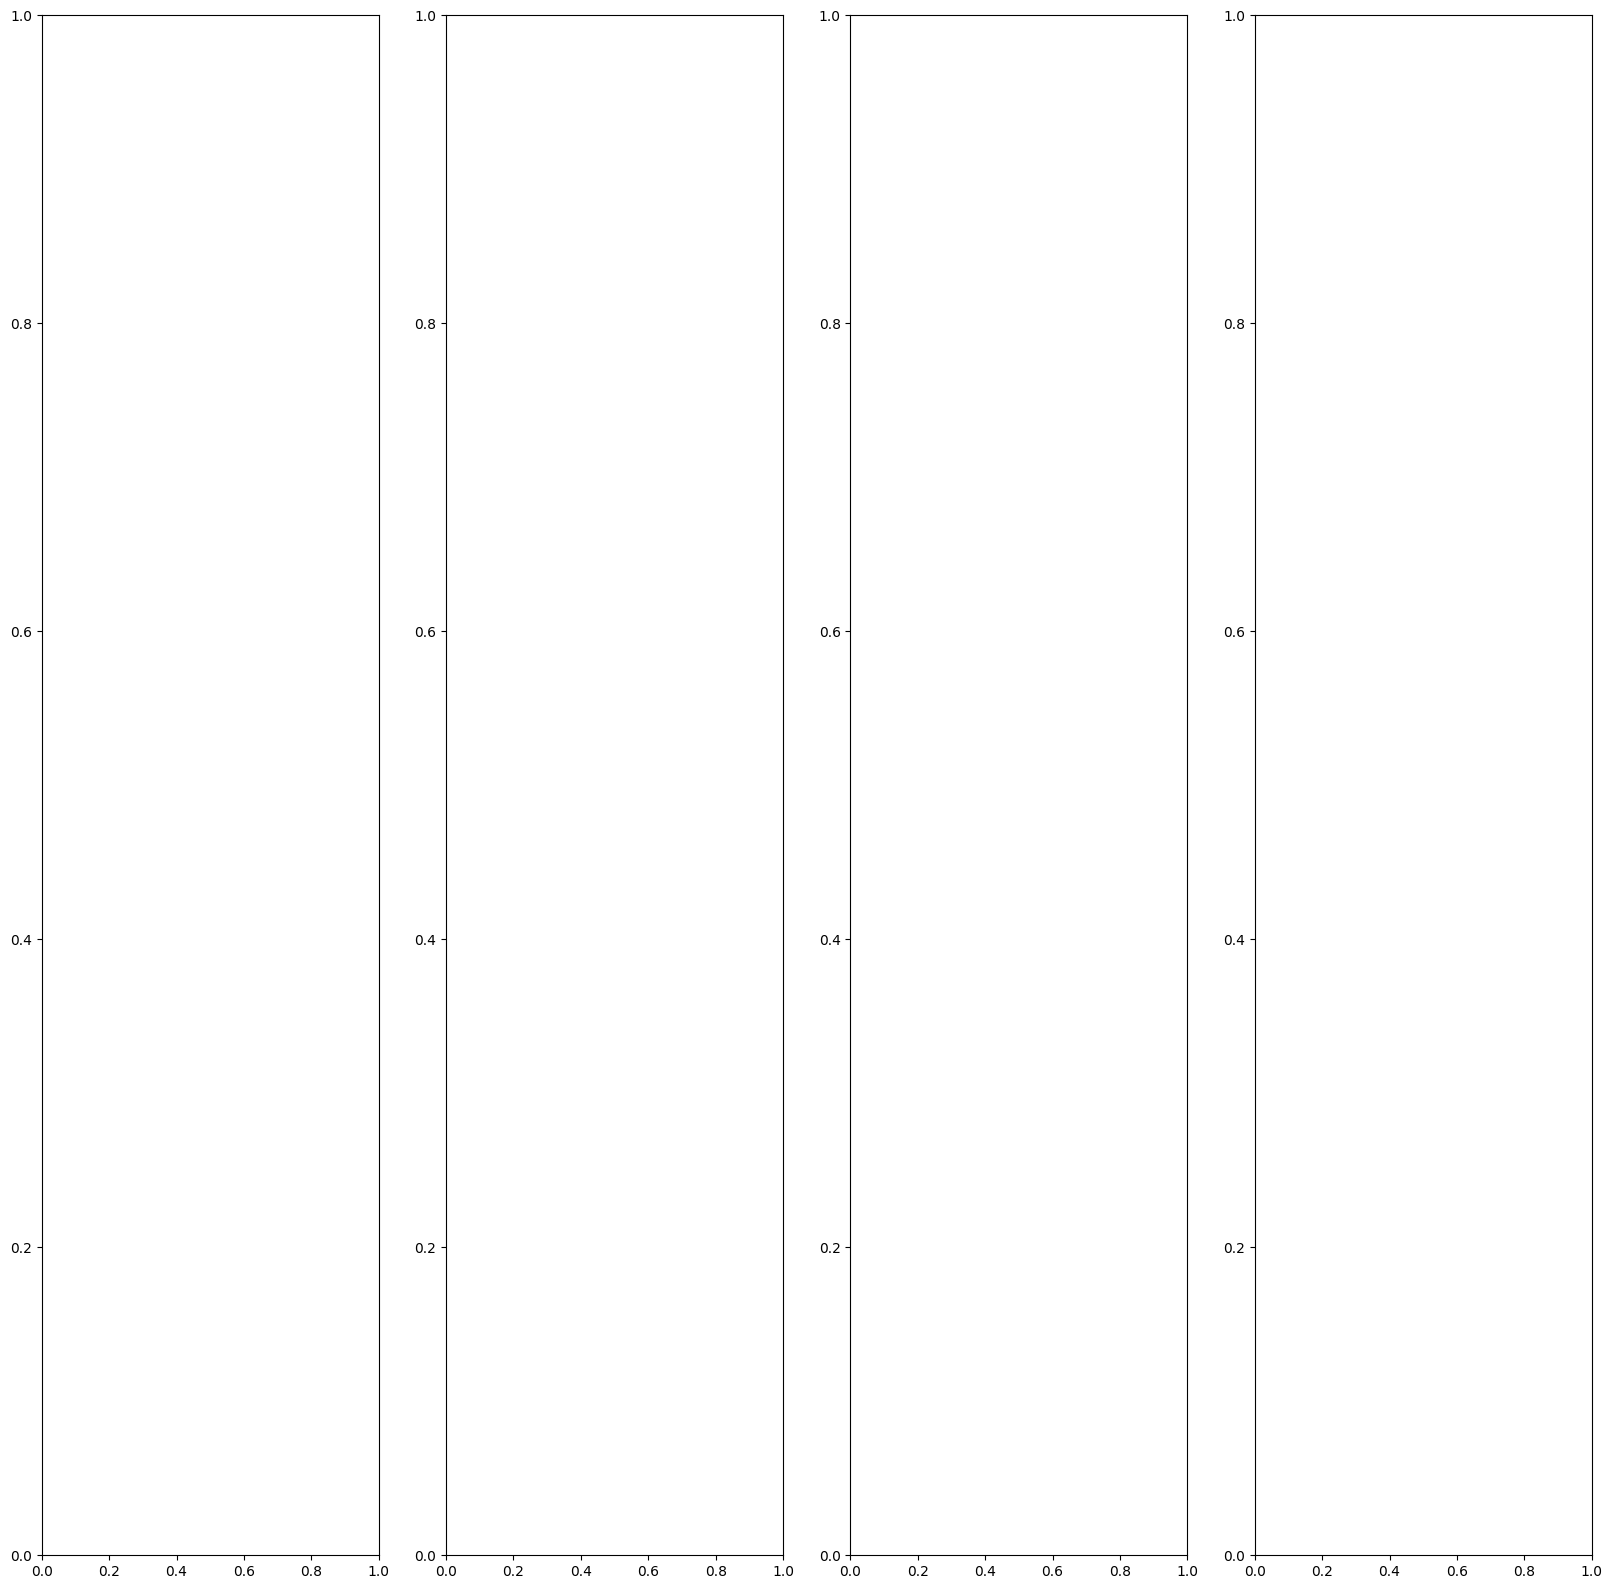

In [153]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [154]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [155]:
vgg = VGG16(include_top=False)

In [156]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [158]:
facetracker = build_model()


In [159]:
facetracker.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      2,049 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │      8,196 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [160]:

X, y = train.as_numpy_iterator().next()

In [161]:
X.shape

(8, 120, 120, 3)

In [162]:

classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


In [163]:
classes, coords

(array([[0.34089723],
        [0.42408204],
        [0.5119341 ],
        [0.4643845 ],
        [0.39123175],
        [0.3758184 ],
        [0.4422889 ],
        [0.38739383]], dtype=float32),
 array([[0.36340627, 0.5167285 , 0.50472265, 0.4463508 ],
        [0.41169316, 0.5659894 , 0.5184469 , 0.5687858 ],
        [0.29454365, 0.62479764, 0.44853842, 0.5298381 ],
        [0.40765232, 0.50647765, 0.38466227, 0.55811656],
        [0.35298914, 0.53627336, 0.5392724 , 0.36859828],
        [0.35567057, 0.5463631 , 0.5439162 , 0.38824677],
        [0.35170725, 0.5420834 , 0.510744  , 0.54036665],
        [0.35212785, 0.53448796, 0.54806435, 0.3677677 ]], dtype=float32))

In [164]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [165]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)


C:\Users\Raghav Aggarwal\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [166]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [167]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [168]:
localization_loss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=3.973724>

In [169]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.673221>

In [170]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=3.973724>

In [171]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [172]:
model = FaceTracker(facetracker)

In [173]:
model.compile(opt, classloss, regressloss)
    

In [174]:
logdir='logs'

In [175]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [176]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


ValueError: Cannot take the length of shape with unknown rank.

TypeError: FaceTracker.compile() missing 3 required positional arguments: 'opt', 'classloss', and 'localizationloss'

In [113]:
hist.history

NameError: name 'hist' is not defined

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:

test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

In [ ]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.h5')